## Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('train.csv')

In [8]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

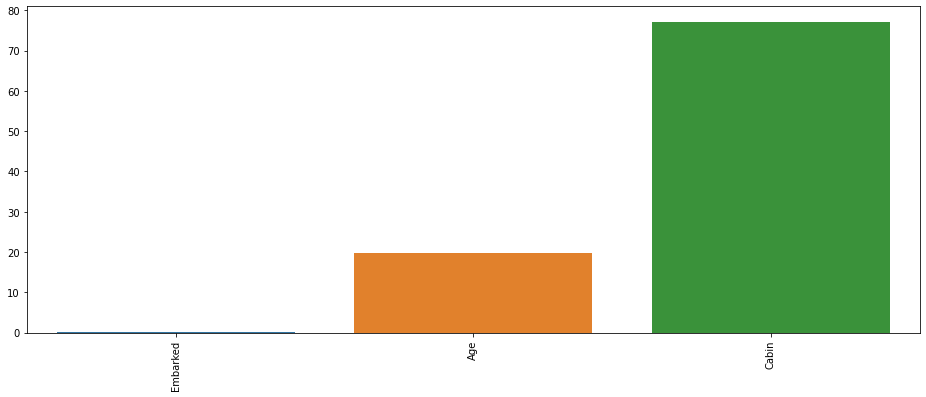

In [9]:
missing = percent_missing(df)
plt.figure(figsize = (16,6))
sns.barplot(x = missing.index, y = missing)
plt.xticks(rotation = 90);

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
df.groupby('Pclass').mean()

,PassengerId,Age,SibSp,Parch,Fare
Pclass,,,,,
1,1098.224299,40.918367,0.476636,0.383178,94.280297
2,1117.935484,28.777500,0.376344,0.344086,22.202104
3,1094.178899,24.027945,0.463303,0.417431,12.459678


In [6]:
df['Fare'] = df['Fare'].fillna(12.45967)

### Cabin

In [10]:
df[df['Cabin'].notnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [21]:
df['Cabin'].nunique()

76

In [11]:
df['Cabin'] = df['Cabin'].fillna("None")

In [35]:
cabins = list(df[df['Cabin'].notnull()]['Cabin'])

In [36]:
cabins.sort()

In [12]:
df['Cabin Class']= df['Cabin'].apply(lambda x:x[0])

In [13]:
df['Cabin Class'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin Class, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
 12  Cabin Class  891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


### Ticket

In [ ]:
df['Ticket'].value_counts()

In [ ]:
df[df['Ticket']== '1601']

In [ ]:
df[df['Ticket']== 'CA. 2343']

In [ ]:
df[df['Ticket']== '347082']

In [ ]:
df[df['Ticket']== '347088']

In [ ]:
df[df['Ticket']== '3101295']

In [15]:
df['First Name'] = df['Name'].apply(lambda x: x.split(',')[0])

In [ ]:
df[df['Ticket']== '2628']

In [ ]:
df['Ticket'].value_counts()

In [ ]:
df["First Name"].value_counts()

In [ ]:
df[df["First Name"] == 'Sage']

In [16]:
df['Family Members'] = df['SibSp']+df['Parch']

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Name            891 non-null    object 
 4   Sex             891 non-null    object 
 5   Age             714 non-null    float64
 6   SibSp           891 non-null    int64  
 7   Parch           891 non-null    int64  
 8   Ticket          891 non-null    object 
 9   Fare            891 non-null    float64
 10  Cabin           891 non-null    object 
 11  Embarked        889 non-null    object 
 12  Cabin Class     891 non-null    object 
 13  First Name      891 non-null    object 
 14  Family Members  891 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 104.5+ KB


### Embarked

In [18]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin Class,First Name,Family Members
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,B,Icard,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,B,Stone,0


In [ ]:
sns.countplot(x = 'Embarked', data = df, hue = 'Survived')

In [ ]:
# df[df['Cabin']== 'B28']

In [19]:
df = df.drop([61,829], axis = 0)

In [ ]:
# df = df.drop('Cabin', axis = 1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     889 non-null    int64  
 1   Survived        889 non-null    int64  
 2   Pclass          889 non-null    int64  
 3   Name            889 non-null    object 
 4   Sex             889 non-null    object 
 5   Age             712 non-null    float64
 6   SibSp           889 non-null    int64  
 7   Parch           889 non-null    int64  
 8   Ticket          889 non-null    object 
 9   Fare            889 non-null    float64
 10  Cabin           889 non-null    object 
 11  Embarked        889 non-null    object 
 12  Cabin Class     889 non-null    object 
 13  First Name      889 non-null    object 
 14  Family Members  889 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 111.1+ KB


### Age

In [ ]:
# df.sort_values()

In [21]:
df[df['Age'].isnull()].sort_values('Family Members').tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin Class,First Name,Family Members
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,None,S,N,Sage,10
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,None,S,N,Sage,10
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,None,S,N,Sage,10
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,None,S,N,Sage,10
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,None,S,N,Sage,10


In [ ]:
# df['Cabin_class']

In [22]:
df['Second Name'] = df['Name'].apply(lambda x : (x.split('.')[0]).split(',')[1].strip())

In [ ]:
df[df['Age'].isnull()].sort_values('Family Members').tail()

In [ ]:
df['Second Name'].value_counts()

In [23]:
df[df['Second Name'] == 'Master']['Age'].mean()

4.574166666666667

In [24]:
names = set(df['Second Name'])

In [25]:
df['Second Name'].value_counts()

Mr              517
Miss            181
Mrs             124
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Don               1
Capt              1
Jonkheer          1
Lady              1
Mme               1
Sir               1
the Countess      1
Ms                1
Name: Second Name, dtype: int64

In [ ]:
# df[(df['Second Name'] == 'Master')].fillna(df[df['Second Name'] == 'Master']['Age'].mean())

In [ ]:
df[df['Second Name'] == 'Mr']['Age'].mean()

In [28]:
age_nonnull = df[df['Age'].notnull()]

In [29]:
for name in names:
    nulls = df[(df['Second Name'] == name)].fillna(df[df['Second Name'] == name]['Age'].mean())
    age_nonnull = pd.concat([age_nonnull, nulls], axis =0)

In [30]:
df = age_nonnull.drop_duplicates()

In [31]:
final_df = df.sort_index()

In [32]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin Class,First Name,Family Members,Second Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,None,S,N,Braund,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,C,Cumings,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,None,S,N,Heikkinen,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,C,Futrelle,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,None,S,N,Allen,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,698,1,3,"Mullens, Miss. Katherine ""Katie""",female,21.662069,0,0,35852,7.7333,None,Q,N,Mullens,0,Miss
727,728,1,3,"Mannion, Miss. Margareth",female,21.662069,0,0,36866,7.7375,None,Q,N,Mannion,0,Miss
792,793,0,3,"Sage, Miss. Stella Anna",female,21.662069,8,2,CA. 2343,69.5500,None,S,N,Sage,10,Miss
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,21.662069,8,2,CA. 2343,69.5500,None,S,N,Sage,10,Miss


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 888
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     889 non-null    int64  
 1   Survived        889 non-null    int64  
 2   Pclass          889 non-null    int64  
 3   Name            889 non-null    object 
 4   Sex             889 non-null    object 
 5   Age             889 non-null    float64
 6   SibSp           889 non-null    int64  
 7   Parch           889 non-null    int64  
 8   Ticket          889 non-null    object 
 9   Fare            889 non-null    float64
 10  Cabin           889 non-null    object 
 11  Embarked        889 non-null    object 
 12  Cabin Class     889 non-null    object 
 13  First Name      889 non-null    object 
 14  Family Members  889 non-null    int64  
 15  Second Name     889 non-null    object 
dtypes: float64(2), int64(6), object(8)
memory usage: 118.1+ KB


In [34]:
df = df.drop('Name', axis = 1)

### Names

In [29]:
df['First Name'].nunique()

KeyError: 'First Name'

In [35]:
df = df.drop('First Name', axis = 1)

In [ ]:
df.info()

In [ ]:
df['Second Name'].nunique()

In [ ]:
df['Ticket'].nunique()

In [ ]:
df = df.drop('Ticket', axis = 1)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 888
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     889 non-null    int64  
 1   Survived        889 non-null    int64  
 2   Pclass          889 non-null    int64  
 3   Sex             889 non-null    object 
 4   Age             889 non-null    float64
 5   SibSp           889 non-null    int64  
 6   Parch           889 non-null    int64  
 7   Ticket          889 non-null    object 
 8   Fare            889 non-null    float64
 9   Cabin           889 non-null    object 
 10  Embarked        889 non-null    object 
 11  Cabin Class     889 non-null    object 
 12  Family Members  889 non-null    int64  
 13  Second Name     889 non-null    object 
dtypes: float64(2), int64(6), object(6)
memory usage: 104.2+ KB


In [37]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin Class,Family Members,Second Name
0,1,0,3,male,22.000000,1,0,A/5 21171,7.2500,None,S,N,1,Mr
1,2,1,1,female,38.000000,1,0,PC 17599,71.2833,C85,C,C,1,Mrs
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,None,S,N,0,Miss
3,4,1,1,female,35.000000,1,0,113803,53.1000,C123,S,C,1,Mrs
4,5,0,3,male,35.000000,0,0,373450,8.0500,None,S,N,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,698,1,3,female,21.662069,0,0,35852,7.7333,None,Q,N,0,Miss
727,728,1,3,female,21.662069,0,0,36866,7.7375,None,Q,N,0,Miss
792,793,0,3,female,21.662069,8,2,CA. 2343,69.5500,None,S,N,10,Miss
863,864,0,3,female,21.662069,8,2,CA. 2343,69.5500,None,S,N,10,Miss


### Setting data

In [38]:
X_str = df[['Sex', 'Second Name', 'Cabin Class', 'Embarked']]

In [39]:
X_int = df.drop(['Sex', 'Second Name', 'Cabin Class', 'Embarked'], axis = 1)

In [40]:
X_str_dummies = pd.get_dummies(data = X_str, drop_first=True)

In [41]:
X_str_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 888
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Sex_male                  889 non-null    uint8
 1   Second Name_Col           889 non-null    uint8
 2   Second Name_Don           889 non-null    uint8
 3   Second Name_Dr            889 non-null    uint8
 4   Second Name_Jonkheer      889 non-null    uint8
 5   Second Name_Lady          889 non-null    uint8
 6   Second Name_Major         889 non-null    uint8
 7   Second Name_Master        889 non-null    uint8
 8   Second Name_Miss          889 non-null    uint8
 9   Second Name_Mlle          889 non-null    uint8
 10  Second Name_Mme           889 non-null    uint8
 11  Second Name_Mr            889 non-null    uint8
 12  Second Name_Mrs           889 non-null    uint8
 13  Second Name_Ms            889 non-null    uint8
 14  Second Name_Rev           889 non-null    

In [42]:
X_str_dummies

,Sex_male,Second Name_Col,Second Name_Don,Second Name_Dr,Second Name_Jonkheer,Second Name_Lady,Second Name_Major,Second Name_Master,Second Name_Miss,Second Name_Mlle,...,Cabin Class_B,Cabin Class_C,Cabin Class_D,Cabin Class_E,Cabin Class_F,Cabin Class_G,Cabin Class_N,Cabin Class_T,Embarked_Q,Embarked_S
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
727,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
792,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
863,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [43]:
df_combined = pd.concat([X_str_dummies,X_int], axis = 1)

In [52]:
df_combined = df_combined.drop('Ticket', axis = 1)

In [63]:
X = df_combined.drop(['Cabin','Survived'], axis = 1)

In [54]:
y = df_combined['Survived']

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [67]:
scaler = StandardScaler()

In [68]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 622 entries, 650 to 240
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sex_male                  622 non-null    uint8  
 1   Second Name_Col           622 non-null    uint8  
 2   Second Name_Don           622 non-null    uint8  
 3   Second Name_Dr            622 non-null    uint8  
 4   Second Name_Jonkheer      622 non-null    uint8  
 5   Second Name_Lady          622 non-null    uint8  
 6   Second Name_Major         622 non-null    uint8  
 7   Second Name_Master        622 non-null    uint8  
 8   Second Name_Miss          622 non-null    uint8  
 9   Second Name_Mlle          622 non-null    uint8  
 10  Second Name_Mme           622 non-null    uint8  
 11  Second Name_Mr            622 non-null    uint8  
 12  Second Name_Mrs           622 non-null    uint8  
 13  Second Name_Ms            622 non-null    uint8  
 14  Second N

In [69]:
X_train = scaler.fit_transform(X_train)

In [70]:
X_test = scaler.transform(X_test)

In [73]:
from sklearn.linear_model import LogisticRegression

In [75]:
log_model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
pred = model.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [ ]:
accuracy_score(y_train, pred)

In [ ]:
plot_confusion_matrix(model, X_train, y_train)

In [ ]:
print(classification_report(y_train, pred))